Explained variance ratio (PC1, PC2): [0.72770452 0.23030523]


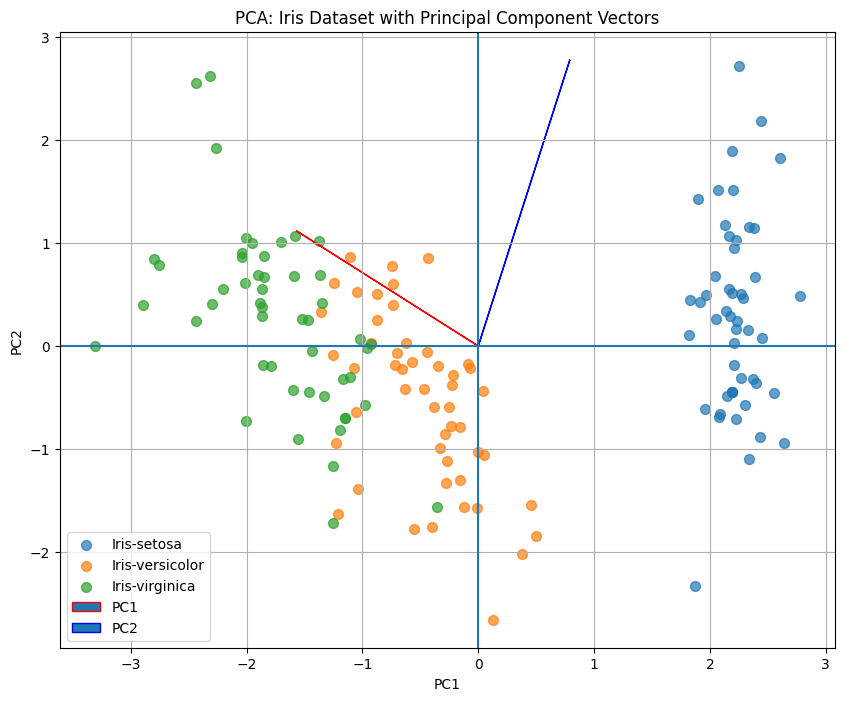

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Standardize
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X_stdzd = (X - X_mean) / X_std

# Covariance and eigen-decomposition
cov = np.cov(X_stdzd, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov)

# Sort by descending eigenvalue
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Project onto first 2 components
principal_axes = eigvecs[:, :2]
X_pca = X_stdzd @ principal_axes 

# Explained variance ratio
explained_var = eigvals[:2] / eigvals.sum()
print("Explained variance ratio (PC1, PC2):", explained_var)

# ---------- PLOT WITH PRINCIPAL COMPONENT ARROWS ----------
plt.figure(figsize=(10, 8))
scale = 3

# Scatter plot by species
for specie in df['Species'].unique():
    idx = df['Species'] == specie
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=specie, s=50, alpha=0.7)

# Plot PC1 and PC2 as ARROWS (scaled for visibility)
plt.arrow(0, 0, principal_axes[0,0]*scale, principal_axes[0,1]*scale, 
           ec='red',  label='PC1')
plt.arrow(0, 0, principal_axes[1,0]*scale, principal_axes[1,1]*scale, 
            ec='blue',  label='PC2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Iris Dataset with Principal Component Vectors')
plt.legend()
plt.grid(True)
plt.axhline()
plt.axvline()
plt.show()


Explained variance ratio (PC1, PC2): [0.72770452 0.23030523]


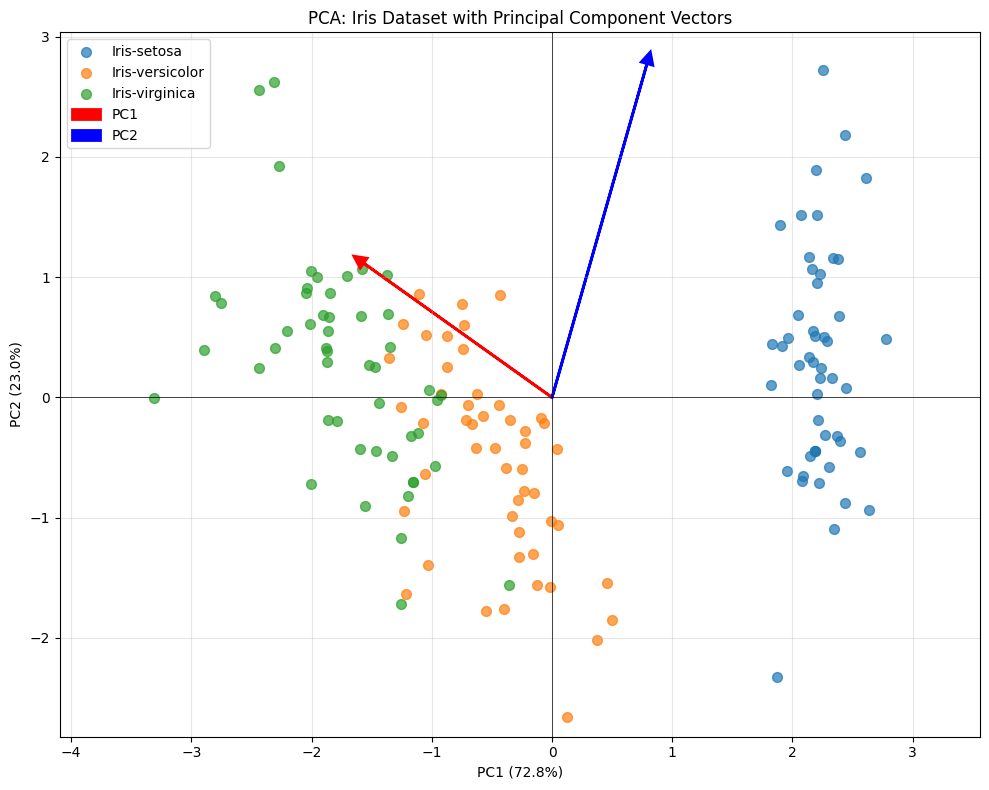

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Standardize
X_mean = X.mean(axis=0)
X_std  = X.std(axis=0)
X_stdzd = (X - X_mean) / X_std

# Covariance and eigen-decomposition
cov = np.cov(X_stdzd, rowvar=False)
eigvals, eigvecs = np.linalg.eigh(cov)

# Sort by descending eigenvalue
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Project onto first 2 components
principal_axes = eigvecs[:, :2]
X_pca = X_stdzd @ principal_axes 

# Explained variance ratio
explained_var = eigvals[:2] / eigvals.sum()
print("Explained variance ratio (PC1, PC2):", explained_var)

# ---------- PLOT WITH PRINCIPAL COMPONENT ARROWS ----------
plt.figure(figsize=(10, 8))
scale = 3  # ADD THIS LINE - arrow scaling factor

# Scatter plot by species
for specie in df['Species'].unique():
    idx = df['Species'] == specie
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=specie, s=50, alpha=0.7)

# Plot PC1 and PC2 as ARROWS
plt.arrow(0, 0, principal_axes[0,0]*scale, principal_axes[0,1]*scale, 
          head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2, label='PC1')
plt.arrow(0, 0, principal_axes[1,0]*scale, principal_axes[1,1]*scale, 
          head_width=0.1, head_length=0.1, fc='blue', ec='blue', linewidth=2, label='PC2')

plt.xlabel(f'PC1 ({explained_var[0]:.1%})')
plt.ylabel(f'PC2 ({explained_var[1]:.1%})')
plt.title('PCA: Iris Dataset with Principal Component Vectors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()


PC1+PC2 explain: 95.80097536148197 %


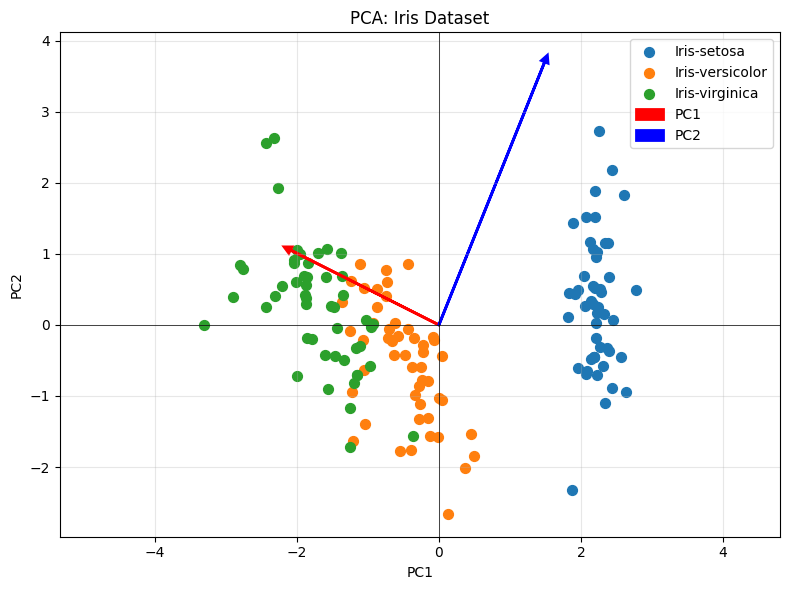

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"D:\Coding\MSc\3rd sem\Datasets\AI&ML_Dataset\Iris.csv")
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Standardize
X_stdzd = (X - X.mean(axis=0)) / X.std(axis=0)

# PCA: covariance → eigenvalues/vectors → project
cov = np.cov(X_stdzd, rowvar=False)  # FIXED: Correct covariance
eigvals, eigvecs = np.linalg.eigh(cov)
idx = eigvals.argsort()[::-1]
X_pca = X_stdzd @ eigvecs[:, idx[:2]]  # PC1=idx[0], PC2=idx[1]

print("PC1+PC2 explain:", np.sum(eigvals[idx[:2]]/eigvals.sum())*100, "%")

# Plot
plt.figure(figsize=(8, 6))
for specie in df['Species'].unique():
    idx_species = df['Species'] == specie
    plt.scatter(X_pca[idx_species, 0], X_pca[idx_species, 1], label=specie, s=50)

# FIXED: PC arrows using correct indexing
scale = 4
# PC1 arrow (first column of first principal component)
plt.arrow(0, 0, eigvecs[0, idx[0]]*scale, eigvecs[1, idx[0]]*scale, 
          fc='red', ec='red', lw=2, head_width=0.1, head_length=0.1, label='PC1')
# PC2 arrow (first column of second principal component)  
plt.arrow(0, 0, eigvecs[0, idx[1]]*scale, eigvecs[1, idx[1]]*scale, 
          fc='blue', ec='blue', lw=2, head_width=0.1, head_length=0.1, label='PC2')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Iris Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.axis('equal')
plt.tight_layout()
plt.show()
